# Discover what is in the dataset about Unicorn Companies

In [1]:
# Import libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Load the dataset into a DataFrame
companies = pd.read_csv("Unicorn_Companies.csv")
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [3]:
# How large the dataset is

companies.size

10740

In [4]:
# Shape of the dataset

companies.shape

(1074, 10)

In [5]:
# Get information

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [6]:
# Get descriptive statistics

companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


### Convert the `Date Joined` column to datetime

Use the `to_datetime()` function from the `pandas` library  to convert the `Date Joined` column to datetime. This splits each value into year, month, and date components. This is an important step in data cleaning, as it makes the data in this column easier to use in tasks you may encounter. To name a few examples, you may need to compare "date joined" between companies or determine how long it took a company to become a unicorn. Having "date joined" in datetime form would help you complete such tasks.

In [7]:
# Converting Date Joined to datetime data type

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])
companies["Date Joined"].head(5)

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2011-12-12
Name: Date Joined, dtype: datetime64[ns]

In [8]:
# Use .info() to confirm that the update actually took place

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


### Create a `Year Joined` column

It is common to encounter situations where you will need to compare the year joined with the year founded. The `Date Joined` column does not just have year—it has the year, month, and date. Extract the year component from the `Date Joined` column and add those year components into a new column to keep track of each company's year joined.

In [9]:
# Defining Year Joined column using datetime library

companies["Year Joined"] = companies["Date Joined"].dt.year

In [10]:
# Use .head() to confirm that the new column did get added

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [11]:
# Sample the data

companies_sample = companies.sample(50, random_state = 1).reset_index()
companies_sample.head()

,index,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,635,Qingting FM,$1B,2021-06-02,Internet software & services,Shanghai,China,Asia,2011,$164M,"China Culture Industrial Investment Fund, We C...",2021
1,428,Zenoti,$2B,2020-12-15,Internet software & services,Bellevue,United States,North America,2010,$331M,"Norwest Venture Partners, Accel, Tiger Global ...",2020
2,49,OutSystems,$10B,2018-06-05,Internet software & services,Boston,United States,North America,2001,$572M,"KKR, ES Ventures, North Bridge Growth Equity",2018
3,204,Articulate,$4B,2021-07-01,Edtech,New York,United States,North America,2015,$2B,"Blackstone, ICONIQ Growth, General Atlantic",2021
4,998,PicsArt,$1B,2021-08-26,Mobile & telecommunications,San Francisco,United States,North America,2011,$195M,"Sequoia Capital, DCM Ventures, Insight Partners",2021


In [13]:
# Prepare data for visualizing the longest time it took companies to reach unicorn status for each industry represented in the sample

companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

grouped = companies_sample[["Industry", "years_till_unicorn"]].groupby("Industry").max().sort_values(by = "years_till_unicorn",ascending=True)
grouped

,years_till_unicorn
Industry,
Consumer & retail,2
Auto & transportation,3
Hardware,3
Health,3
"Supply chain, logistics, & delivery",4
Artificial intelligence,5
Other,8
Edtech,10
Mobile & telecommunications,10


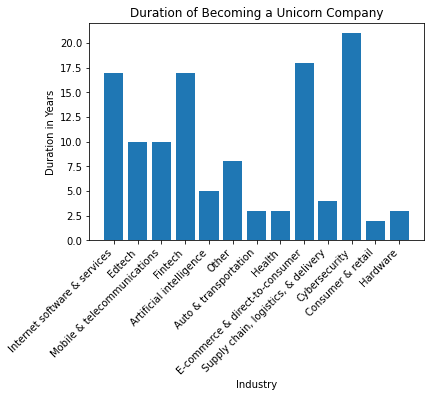

In [14]:
# Create bar plot

fig = plt.bar(companies_sample["Industry"], companies_sample["years_till_unicorn"])

plt.title("Duration of Becoming a Unicorn Company")
plt.xlabel("Industry")
plt.ylabel("Duration in Years")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [16]:
# Visualizing the maximum unicorn company valuation per industry

# Create a new column
companies_sample['valuation_billions'] = companies_sample['Valuation']
# Remove the '$' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '', regex=False)
# Remove the 'B' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '',regex=False)
# Convert column to type int
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,index,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
0,635,Qingting FM,$1B,2021-06-02,Internet software & services,Shanghai,China,Asia,2011,$164M,"China Culture Industrial Investment Fund, We C...",2021,10,1
1,428,Zenoti,$2B,2020-12-15,Internet software & services,Bellevue,United States,North America,2010,$331M,"Norwest Venture Partners, Accel, Tiger Global ...",2020,10,2
2,49,OutSystems,$10B,2018-06-05,Internet software & services,Boston,United States,North America,2001,$572M,"KKR, ES Ventures, North Bridge Growth Equity",2018,17,10
3,204,Articulate,$4B,2021-07-01,Edtech,New York,United States,North America,2015,$2B,"Blackstone, ICONIQ Growth, General Atlantic",2021,6,4
4,998,PicsArt,$1B,2021-08-26,Mobile & telecommunications,San Francisco,United States,North America,2011,$195M,"Sequoia Capital, DCM Ventures, Insight Partners",2021,10,1


In [17]:
companies_sample.info()
companies_sample['valuation_billions'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               50 non-null     int64         
 1   Company             50 non-null     object        
 2   Valuation           50 non-null     object        
 3   Date Joined         50 non-null     datetime64[ns]
 4   Industry            50 non-null     object        
 5   City                50 non-null     object        
 6   Country/Region      50 non-null     object        
 7   Continent           50 non-null     object        
 8   Year Founded        50 non-null     int64         
 9   Funding             50 non-null     object        
 10  Select Investors    50 non-null     object        
 11  Year Joined         50 non-null     int64         
 12  years_till_unicorn  50 non-null     int64         
 13  valuation_billions  50 non-null     int32         
d

0     1
1     2
2    10
3     4
4     1
Name: valuation_billions, dtype: int32

In [18]:
# Prepare data for modeling
grouped = companies_sample[["Industry", "valuation_billions"]].groupby("Industry").max().sort_values(by="valuation_billions")
grouped

,valuation_billions
Industry,
Consumer & retail,1
Mobile & telecommunications,1
Cybersecurity,2
Other,3
Auto & transportation,4
Edtech,4
Hardware,5
Artificial intelligence,7
Health,8


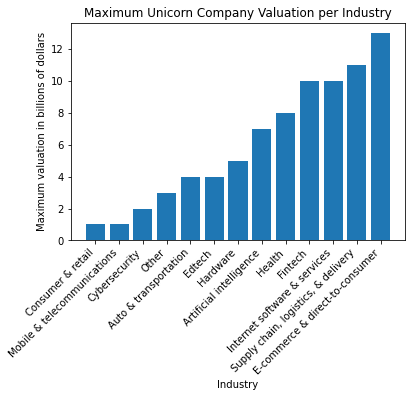

In [23]:
# Create bar plot

plt.bar(grouped.index, grouped["valuation_billions"])
plt.title("Maximum Unicorn Company Valuation per Industry")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


**References**

Bhat, M.A. (2022, March). [*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 